In [66]:
from keras.models import load_model, model_from_json
import glob
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [11]:
model_dir = 'models/keras/patience10_vgg16/'
model = load_model(model_dir + 'best_model.h5')

In [12]:
val_imgs = glob.glob('data/cropped_split/val/*/*.jpg')
print(len(val_imgs))

5120


In [35]:
"positive" in val_imgs[0]

True

In [61]:
df = pd.DataFrame()

In [62]:
from tqdm import tqdm
for path in tqdm(val_imgs):
    if "positive" in path:
        positive = 1
    else: 
        positive = 0
    image = np.array(Image.open(path))
    expanded = np.expand_dims(image, axis=0)
    output = model.predict(expanded)
    neg_prob, pos_prob = output[0][0], output[0][1]
    if positive and (pos_prob > neg_prob):
        correct = 1
    elif (not positive) and (pos_prob < neg_prob):
        correct = 1
    else: 
        correct = 0 
    if (pos_prob > neg_prob):
        pos_pred = 1
    else: 
        pos_pred = 0
    new_row = {'path': path, 'positive': positive, 'neg_prob': neg_prob, 'pos_prob': pos_prob, 'correct': correct, 'pos_pred': pos_pred}
    df = df.append(new_row, ignore_index=True)

100%|██████████| 5120/5120 [03:53<00:00, 21.89it/s]


In [63]:
print(df['correct'].value_counts())
print(df['positive'].value_counts())
print(df['pos_pred'].value_counts())
df.head()

1.0    4204
0.0     916
Name: correct, dtype: int64
0.0    4188
1.0     932
Name: positive, dtype: int64
0.0    5072
1.0      48
Name: pos_pred, dtype: int64


,correct,neg_prob,path,pos_pred,pos_prob,positive
0,0.0,0.821017,data/cropped_split/val/positive/ISIC_0013988_d...,0.0,0.178983,1.0
1,0.0,0.875337,data/cropped_split/val/positive/ISIC_0063950.jpg,0.0,0.124663,1.0
2,0.0,0.967362,data/cropped_split/val/positive/ISIC_0014434_d...,0.0,0.032638,1.0
3,0.0,0.555218,data/cropped_split/val/positive/ISIC_0068962.jpg,0.0,0.444782,1.0
4,0.0,0.978072,data/cropped_split/val/positive/ISIC_0032197.jpg,0.0,0.021928,1.0


In [64]:
df[df['pos_pred'] == 1]

,correct,neg_prob,path,pos_pred,pos_prob,positive
61,1.0,0.158004,data/cropped_split/val/positive/ISIC_0061770.jpg,1.0,0.841996,1.0
93,1.0,0.413684,data/cropped_split/val/positive/ISIC_0069381.jpg,1.0,0.586316,1.0
185,1.0,0.345678,data/cropped_split/val/positive/ISIC_0058063.jpg,1.0,0.654322,1.0
192,1.0,0.318519,data/cropped_split/val/positive/ISIC_0058837.jpg,1.0,0.681481,1.0
200,1.0,0.405199,data/cropped_split/val/positive/ISIC_0067248.jpg,1.0,0.594801,1.0
211,1.0,0.189704,data/cropped_split/val/positive/ISIC_0057302.jpg,1.0,0.810296,1.0
223,1.0,0.492151,data/cropped_split/val/positive/ISIC_0058798.jpg,1.0,0.507849,1.0
327,1.0,0.458166,data/cropped_split/val/positive/ISIC_0061950.jpg,1.0,0.541834,1.0
340,1.0,0.466557,data/cropped_split/val/positive/ISIC_0067539.jpg,1.0,0.533443,1.0
426,1.0,0.342219,data/cropped_split/val/positive/ISIC_0014985_d...,1.0,0.657781,1.0


ValueError: The name "dense_1" is used 2 times in the model. All layer names should be unique.

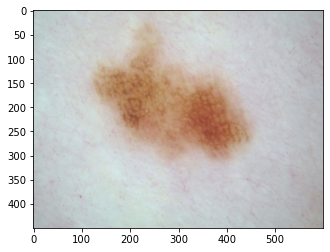

[[0.98955065 0.01044933]]


NameError: name 'analyzer' is not defined

In [67]:
paths = ['data/cropped_split/val/positive/ISIC_0000434_downsampled.jpg', 'data/cropped_split/val/negative/ISIC_0000199.jpg']
for path in paths:
    image = np.array(Image.open(path))
    expanded = np.expand_dims(image, axis=0)
    plt.imshow(image)
    plt.show()
    print(model.predict(expanded))
    a = analyzer.analyze(expanded, 0)
    a = a.sum(axis=np.argmax(np.asarray(a.shape) == 3))
    a /= np.max(np.abs(a))
    # Plot
    plt.imshow(a[0], cmap="seismic", clim=(-1, 1))
    plt.show()